### 12 Cmean clustering
Gayantha R. L. Kodikara, @ UWM, 31/05/2024

In [1]:
from time import time
t1 = time()
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from osgeo import gdal, gdal_array
import time
import math
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
img = np.load('TuffBed_0298_DLS_Idx_np3D.npy')
new_shape = (img.shape[0] * img.shape[1], img.shape[2])
print(img.shape)
print(new_shape)
X = img[:,:,:5].reshape(new_shape)
X = np.around(X,5)
print(X.shape)

(900, 1200, 5)
(1080000, 5)
(1080000, 5)


In [3]:
# Generate some example data
np.random.seed(0)
#data = np.random.rand(100, 2)
data = X 
# Define the number of clusters
n_clusters = 11
 
# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data.T, n_clusters, 2, error=0.005, maxiter=1000, init=None
)
 
# Predict cluster membership for each data point
cluster_membership = np.argmax(u, axis=0)
 
# Print the cluster centers
print('Cluster Centers:', cntr)
 
# Print the cluster membership for each data point
print('Cluster Membership:', cluster_membership)

Cluster Centers: [[0.43268866 0.14176863 0.16255438 0.16961255 0.5754552 ]
 [0.21604209 0.01983387 0.04225262 0.20589454 0.42231812]
 [0.45121279 0.15366766 0.17634062 0.17488378 0.59548733]
 [0.31775513 0.06761442 0.09529634 0.21385339 0.51829385]
 [0.37124542 0.09884436 0.1245371  0.19860761 0.54903498]
 [0.46117952 0.1592881  0.19164045 0.19014297 0.61971242]
 [0.48318802 0.17736582 0.21015981 0.20117615 0.64403439]
 [0.27300732 0.04484191 0.0678697  0.21920676 0.48213808]
 [0.42079013 0.12950509 0.14676249 0.19254642 0.57907475]
 [0.35060842 0.0968411  0.10968859 0.17461293 0.50446169]
 [0.4007341  0.12194576 0.13858203 0.17664411 0.55100287]]
Cluster Membership: [0 0 2 ... 6 6 6]


In [4]:
cluster_membership.shape

(1080000,)

In [5]:
cluster_class = cluster_membership.reshape(900,1200)
cluster_class.shape

(900, 1200)

In [6]:
np.save('Cluster_classes.npy',cluster_class)

In [7]:
np.save('Centeroid_value.npy',cntr)

In [8]:
cntr

array([[0.43268866, 0.14176863, 0.16255438, 0.16961255, 0.5754552 ],
       [0.21604209, 0.01983387, 0.04225262, 0.20589454, 0.42231812],
       [0.45121279, 0.15366766, 0.17634062, 0.17488378, 0.59548733],
       [0.31775513, 0.06761442, 0.09529634, 0.21385339, 0.51829385],
       [0.37124542, 0.09884436, 0.1245371 , 0.19860761, 0.54903498],
       [0.46117952, 0.1592881 , 0.19164045, 0.19014297, 0.61971242],
       [0.48318802, 0.17736582, 0.21015981, 0.20117615, 0.64403439],
       [0.27300732, 0.04484191, 0.0678697 , 0.21920676, 0.48213808],
       [0.42079013, 0.12950509, 0.14676249, 0.19254642, 0.57907475],
       [0.35060842, 0.0968411 , 0.10968859, 0.17461293, 0.50446169],
       [0.4007341 , 0.12194576, 0.13858203, 0.17664411, 0.55100287]])

In [9]:
u.shape

(11, 1080000)

In [10]:
uT = (u.T).reshape(900,1200,n_clusters)
membership_values = np.float32(uT)
membership_values.shape

(900, 1200, 11)

In [11]:
np.save('Memebership_values.npy',membership_values)

In [12]:
sm = np.sum(membership_values[10,10,:])
sm

0.99999994

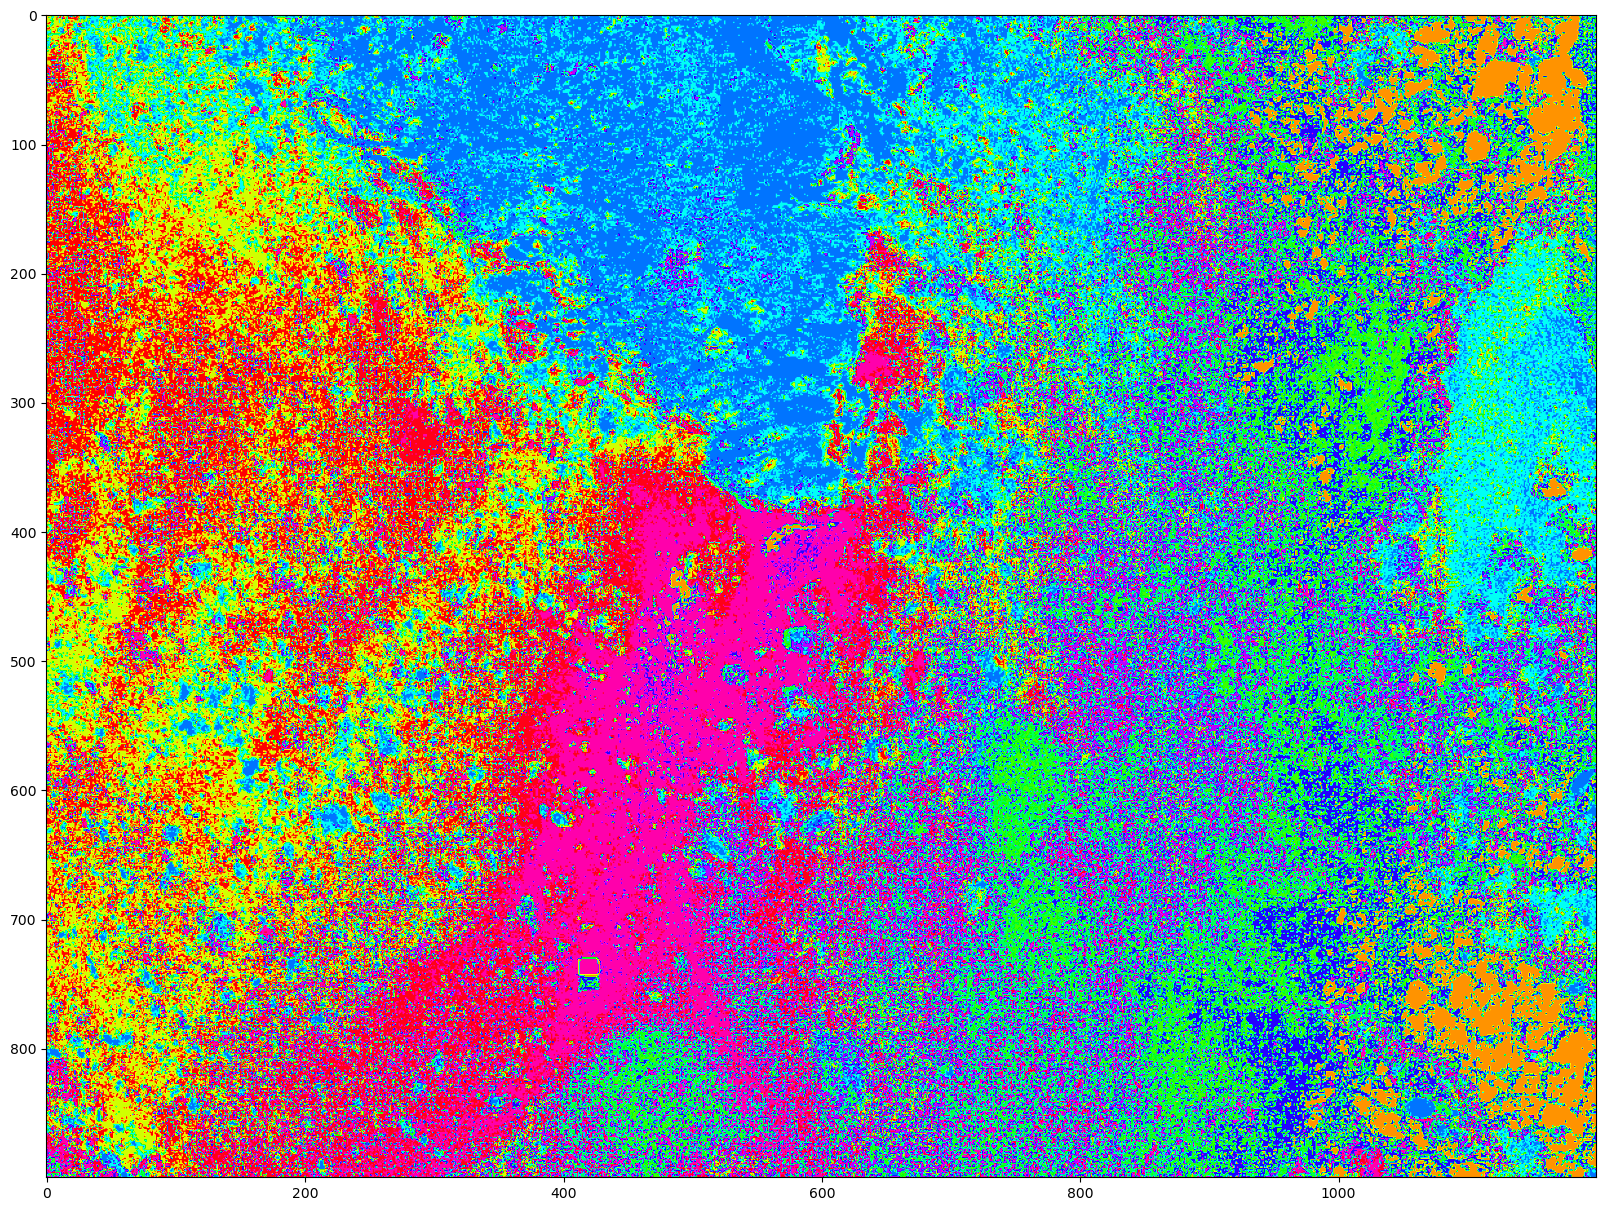

In [13]:
%matplotlib inline
plt.figure(figsize=(20,20))
plt.imshow(cluster_class, cmap="hsv")
#plt.savefig('07Kmeans20_6B_Idx2.png', dpi=600)
plt.show()

In [14]:
driver = gdal.GetDriverByName("GTiff")
[cols, rows, nbands] = img.shape
outDataRaster = driver.Create("Tuff_Bed_0298_DLS_Idx_cmean_11clsn.tiff", rows, cols, 1, gdal.GDT_Byte)
outDataRaster.GetRasterBand(1).WriteArray(cluster_class)
outDataRaster.FlushCache()
del outDataRaster

/home/kodi/.local/lib/python3.9/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [15]:
#driver = gdal.GetDriverByName('GTiff')
#[ncols, nrows, nbands] = membership_values.shape
#dataset = driver.Create('Tuff_Bed_0298_DLS_Idx_cmean_15cls_gamma.tif', ncols, nrows, nbands, gdal.GDT_Float32)
#for i in range(nbands):
#    dataset.GetRasterBand(i).WriteArray(membership_values[:,:,i])
#dataset.FlushCache()
#dataset = None

In [16]:
driver = gdal.GetDriverByName("GTiff")
[cols, rows, nbands] = membership_values.shape
outDataRaster = driver.Create("Tuff_Bed_0298_DLS_Idx_cmean_11cls_ngamma.tif", rows, cols,nbands, gdal.GDT_Float32)
outDataRaster.GetRasterBand(1).WriteArray(membership_values[:,:,0])
outDataRaster.GetRasterBand(2).WriteArray(membership_values[:,:,1])
outDataRaster.GetRasterBand(3).WriteArray(membership_values[:,:,2])
outDataRaster.GetRasterBand(4).WriteArray(membership_values[:,:,3])
outDataRaster.GetRasterBand(5).WriteArray(membership_values[:,:,4])
outDataRaster.GetRasterBand(6).WriteArray(membership_values[:,:,5])
outDataRaster.GetRasterBand(7).WriteArray(membership_values[:,:,6])
outDataRaster.GetRasterBand(8).WriteArray(membership_values[:,:,7])
outDataRaster.GetRasterBand(9).WriteArray(membership_values[:,:,8])
outDataRaster.GetRasterBand(10).WriteArray(membership_values[:,:,9])
outDataRaster.GetRasterBand(11).WriteArray(membership_values[:,:,10])
#outDataRaster.GetRasterBand(12).WriteArray(membership_values[:,:,11])
#outDataRaster.GetRasterBand(13).WriteArray(membership_values[:,:,12])
#outDataRaster.GetRasterBand(14).WriteArray(membership_values[:,:,13])
#outDataRaster.GetRasterBand(15).WriteArray(membership_values[:,:,14])
outDataRaster.FlushCache()
del outDataRaster

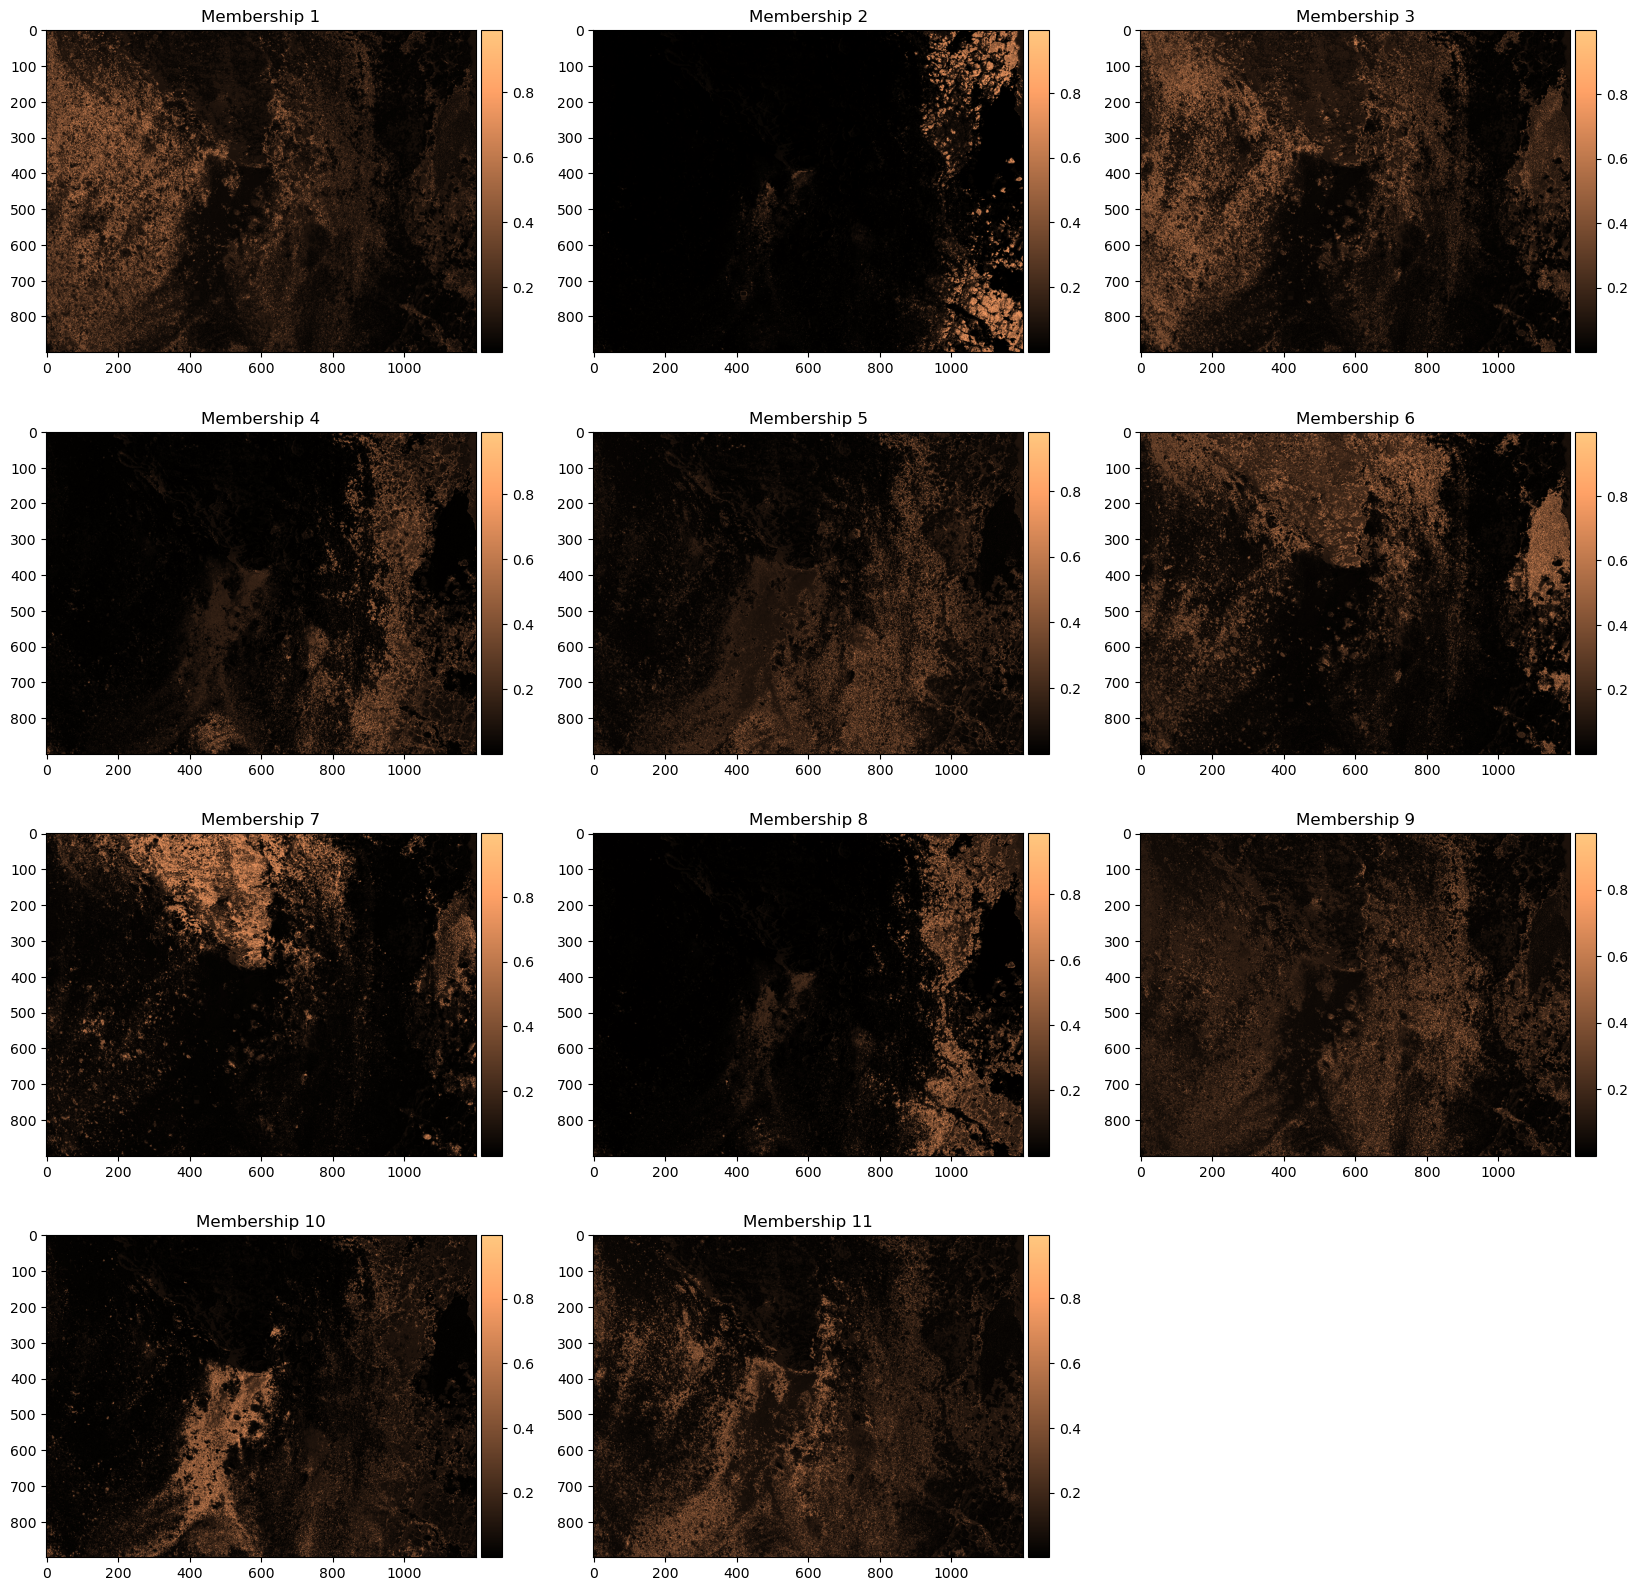

In [17]:
#fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15, 15))
fig = plt.figure(figsize=(20, 20))
spec = mpl.gridspec.GridSpec(ncols=3, nrows=4)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])
ax6 = fig.add_subplot(spec[1,2])
ax7 = fig.add_subplot(spec[2,0])
ax8 = fig.add_subplot(spec[2,1])
ax9 = fig.add_subplot(spec[2,2])
ax10 = fig.add_subplot(spec[3,0])
ax11 = fig.add_subplot(spec[3,1])
im1 = ax1.imshow(membership_values[:,:,0], cmap='copper')
im2 = ax2.imshow(membership_values[:,:,1], cmap='copper')
im3 = ax3.imshow(membership_values[:,:,2], cmap='copper')
im4 = ax4.imshow(membership_values[:,:,3], cmap='copper')
im5 = ax5.imshow(membership_values[:,:,4], cmap='copper')
im6 = ax6.imshow(membership_values[:,:,5], cmap='copper')
im7 = ax7.imshow(membership_values[:,:,6], cmap='copper')
im8 = ax8.imshow(membership_values[:,:,7], cmap='copper')
im9 = ax9.imshow(membership_values[:,:,8], cmap='copper')
im10 = ax10.imshow(membership_values[:,:,9], cmap='copper')
im11 = ax11.imshow(membership_values[:,:,10], cmap='copper')
ax1.set_title('Membership 1')
ax2.set_title('Membership 2')
ax3.set_title('Membership 3')
ax4.set_title('Membership 4')
ax5.set_title('Membership 5')
ax6.set_title('Membership 6')
ax7.set_title('Membership 7')
ax8.set_title('Membership 8')
ax9.set_title('Membership 9')
ax10.set_title('Membership 10')
ax11.set_title('Membership 11')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax3)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im4, cax=cax4)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im5, cax=cax5)
div6 = make_axes_locatable(ax6)
cax6 = div6.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im6, cax=cax6)
div7 = make_axes_locatable(ax7)
cax7 = div7.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im7, cax=cax7)
div8 = make_axes_locatable(ax8)
cax8 = div8.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im8, cax=cax8)
div9 = make_axes_locatable(ax9)
cax9 = div9.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im9, cax=cax9)
div10 = make_axes_locatable(ax10)
cax10 = div10.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im10, cax=cax10)
div11 = make_axes_locatable(ax11)
cax11 = div11.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im11, cax=cax11)
plt.savefig('Tuff_Bed_0298_DLS_Idx_cmean_11cls_Membership.png', dpi=300)
plt.show()

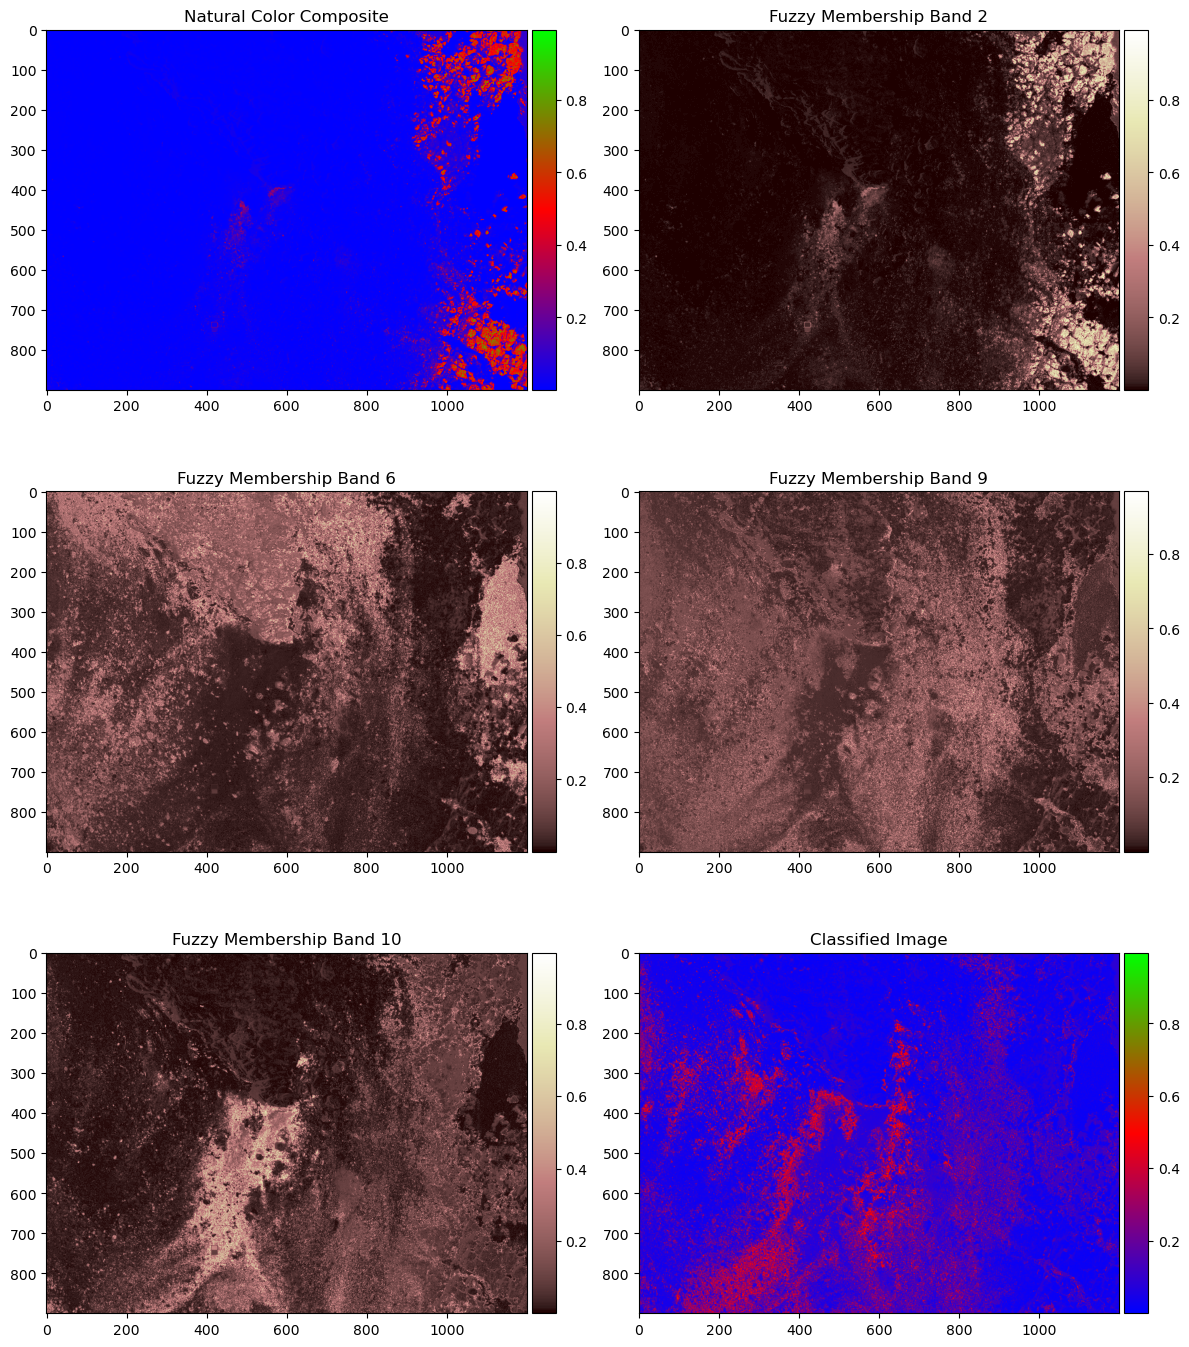

In [18]:
#fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15, 15))
fig = plt.figure(figsize=(12, 14))
spec = mpl.gridspec.GridSpec(ncols=2, nrows=3)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,0])
ax4 = fig.add_subplot(spec[1,1])
ax5 = fig.add_subplot(spec[2,0])
ax6 = fig.add_subplot(spec[2,1])
im1 = ax1.imshow(membership_values[:,:,1], cmap='brg')
im2 = ax2.imshow(membership_values[:,:,1], cmap='pink')
#im1 = ax1.imshow(img)
im3 = ax3.imshow(membership_values[:,:,5], cmap='pink')
im4 = ax4.imshow(membership_values[:,:,8], cmap='pink')
im5 = ax5.imshow(membership_values[:,:,9], cmap='pink')
im6 = ax6.imshow(membership_values[:,:,10], cmap='brg')
ax1.set_title('Natural Color Composite')
ax2.set_title('Fuzzy Membership Band 2')
ax3.set_title('Fuzzy Membership Band 6')
ax4.set_title('Fuzzy Membership Band 9')
ax5.set_title('Fuzzy Membership Band 10')
ax6.set_title('Classified Image')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax3)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im4, cax=cax4)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im5, cax=cax5)
div6 = make_axes_locatable(ax6)
cax6 = div6.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im6, cax=cax6)
plt.tight_layout()
plt.savefig('Tuff_Bed_0298_DLS_Idx_cmean_11cls_gamma.png', dpi=300)
plt.show()

In [19]:
from time import time
t2 = time()
print(t2 - t1)

809.089631319046
